<a href="https://colab.research.google.com/github/AjayAajhey/gvassn/blob/main/salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Salary Discrimination The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor. Year. Number of years in current rank. Degree. Highest degree. 1 for doctorate, 0 for master's. YSdeg. Years since highest degree was earned. Salary. Salary/year in dollars.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [ ]:
from google.colab import files
files.upload()

Saving salary.txt to salary.txt


{'salary.txt': b'       0    3    25    1    35    36350\r\n       0    3    13    1    22    35350\r\n       0    3    10    1    23    28200\r\n       1    3     7    1    27    26775\r\n       0    3    19    0    30    33696\r\n       0    3    16    1    21    28516\r\n       1    3     0    0    32    24900\r\n       0    3    16    1    18    31909\r\n       0    3    13    0    30    31850\r\n       0    3    13    0    31    32850\r\n       0    3    12    1    22    27025\r\n       0    2    15    1    19    24750\r\n       0    3     9    1    17    28200\r\n       0    2     9    0    27    23712\r\n       0    3     9    1    24    25748\r\n       0    3     7    1    15    29342\r\n       0    3    13    1    20    31114\r\n       0    2    11    0    14    24742\r\n       0    2    10    0    15    22906\r\n       0    3     6    0    21    24450\r\n       0    1    16    0    23    19175\r\n       0    2     8    0    31    20525\r\n       0    3     7    1    13    279

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()


,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


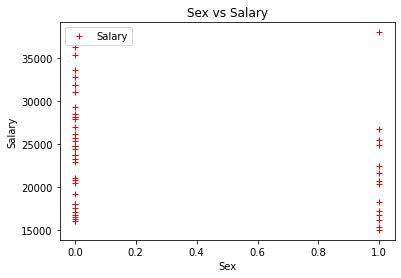

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.plot(x='Sex', y='Salary', style='+',color="red")
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Sex','Salary']].corr()


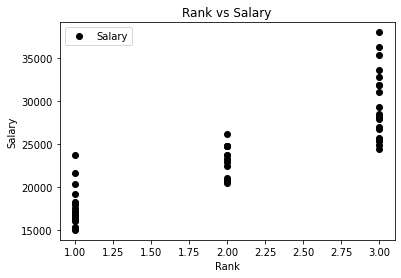

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.plot(x='Rank', y='Salary', style='o',color="k")
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Rank','Salary']].corr()


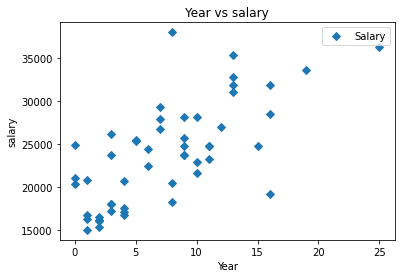

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [ ]:
df.plot(x='Year', y='Salary', style='D')
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Year','Salary']].corr()


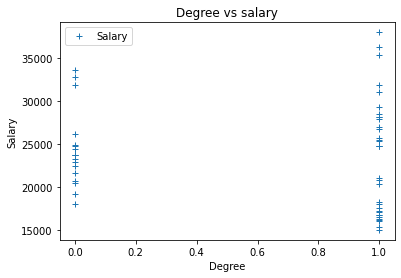

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.plot(x='Degree', y='Salary', style='+')
plt.title('Degree vs salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Degree','Salary']].corr()


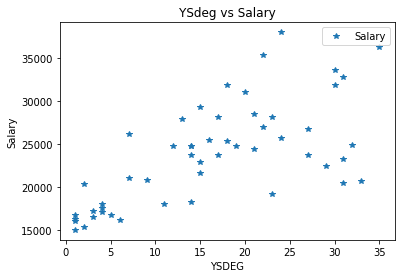

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
df.plot(x='YSdeg', y='Salary', style='*')
plt.title('YSdeg vs Salary')
plt.xlabel('YSDEG')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['YSdeg','Salary']].corr()


In [ ]:
x=df.drop("Salary", axis='columns')
y=df["Salary"]


In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 2)


In [ ]:
model = LinearRegression()  
model.fit(x_train, y_train)
train_data_pred=model.predict(x_train)
error_score=metrics.r2_score(y_train,train_data_pred)
print(error_score)


0.8416559098711704


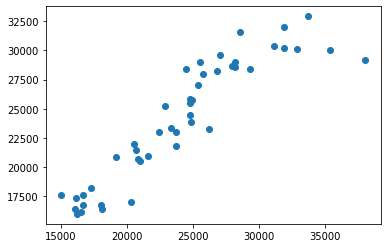

In [ ]:
plt.scatter(y_train,train_data_pred)


In [ ]:
y_pred_model= model.predict(x_test)
y_pred_model

array([16893.94642979, 18844.16352035, 19016.02391215, 16893.94642979,
       17910.96727101, 33539.24216213])

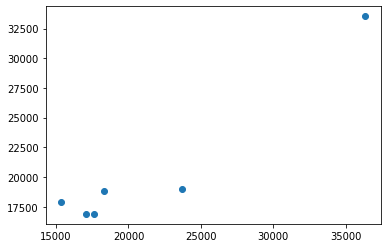

In [ ]:
plt.scatter(y_test,y_pred_model)


In [ ]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
37,17095,16893.946430
36,18304,18844.163520
32,23713,19016.023912
39,17600,16893.946430
47,15350,17910.967271


In [ ]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(x, model.coef_))


Intercept:  11145.951484209072
Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('YSdeg', -146.18425060116738)]

Find the linear regression equation for this data using columns 1-5 to column 6

In [ ]:
Y=(x_test*model.coef_)+model.intercept_

In [ ]:
error_score=metrics.r2_score(y_test,y_pred_model)
print(error_score)

0.8787350351714383


 Find the selection of columns with the best $R^2$ score.

In [ ]:
print("Coefficients:")
list(zip(x, model.coef_))
#We can conclude that sex,rank,year are the best columns since the Coefficient value of degree and YSdeg is negative 


Coefficients:


[('Sex', 1620.4547588761363),
 ('Rank', 5885.541051525828),
 ('Year', 447.90120942534213),
 ('Degree', -1344.413941245155),
 ('YSdeg', -146.18425060116738)]

 Report whether sex is a factor in salary.

In [ ]:
corr = df.corr()["Salary"].sort_values(ascending=False)[1:]
corr

Rank      0.867488
Year      0.700669
YSdeg     0.674854
Degree   -0.069726
Sex      -0.252782
Name: Salary, dtype: float64

# -> From the result obtained above, the correlation value between sex and salary is -0.252782
# -> Since the correlation between sex and city is negative, we can conclude that sex is not a factor or is a bad factor to predict the salary.  
